# Part 1.1:Logistic Regression from scratch


## Importing the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [2]:
data = pd.read_csv('Data/obesity_data.csv')
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
# To add the bias column, I'll do this later in the code, with a seperate array
data.insert(0, 'w0', 1)
data

,w0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,1,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,1,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,1,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
data.head()

,w0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
data.tail()

,w0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,1,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,1,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [6]:
# Checking for null values
data.isnull().sum()

w0                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Handling Categorical Data

In [7]:
data.columns

Index(['w0', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [8]:
categorical_columns = [i for i in data.columns if i not in['family_history_with_overweight','FAVC','SMOKE','SCC']]
categorical_columns

['w0',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'FCVC',
 'NCP',
 'CAEC',
 'CH2O',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [9]:
categorical_yes_no = [i for i in data.columns if i not in(categorical_columns)]
categorical_yes_no

['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

In [10]:
# Handling Yes/No data
data[categorical_yes_no] = pd.DataFrame(np.where(data[categorical_yes_no].values=='yes', 1, 0), data.index)

# Handling Male/Female
data['Gender'] = pd.DataFrame(np.where(data['Gender'].values=='Female', 1, 0), data.index)

data.head()

,w0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,1,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight
1,1,1,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,1,0,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,1,0,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,1,0,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
data.tail()

,w0,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,1,1,20.976842,1.710730,131.408528,1,1,3.0,3.0,Sometimes,0,1.728139,0,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,1,1,21.982942,1.748584,133.742943,1,1,3.0,3.0,Sometimes,0,2.005130,0,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,1,1,22.524036,1.752206,133.689352,1,1,3.0,3.0,Sometimes,0,2.054193,0,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,1,1,24.361936,1.739450,133.346641,1,1,3.0,3.0,Sometimes,0,2.852339,0,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,1,1,23.664709,1.738836,133.472641,1,1,3.0,3.0,Sometimes,0,2.863513,0,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [12]:
# One Hot Encoding
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [16])], remainder='passthrough')
ct_arr = ct.fit_transform(data)
data = pd.DataFrame(ct_arr)
data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0,0,0,1,0,1,1,21,1.62,64,...,2,3,Sometimes,0,2,0,0,1,no,Normal_Weight
1,0,0,0,1,0,1,1,21,1.52,56,...,3,3,Sometimes,1,3,1,3,0,Sometimes,Normal_Weight
2,0,0,0,1,0,1,0,23,1.8,77,...,2,3,Sometimes,0,2,0,2,1,Frequently,Normal_Weight
3,0,0,0,0,1,1,0,27,1.8,87,...,3,3,Sometimes,0,2,0,2,0,Frequently,Overweight_Level_I
4,0,0,0,1,0,1,0,22,1.78,89.8,...,2,1,Sometimes,0,2,0,0,0,Sometimes,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0,0,1,0,1,1,20.9768,1.71073,131.409,...,3,3,Sometimes,0,1.72814,0,1.67627,0.906247,Sometimes,Obesity_Type_III
2107,0,0,0,1,0,1,1,21.9829,1.74858,133.743,...,3,3,Sometimes,0,2.00513,0,1.34139,0.59927,Sometimes,Obesity_Type_III
2108,0,0,0,1,0,1,1,22.524,1.75221,133.689,...,3,3,Sometimes,0,2.05419,0,1.41421,0.646288,Sometimes,Obesity_Type_III
2109,0,0,0,1,0,1,1,24.3619,1.73945,133.347,...,3,3,Sometimes,0,2.85234,0,1.13911,0.586035,Sometimes,Obesity_Type_III


In [13]:
# Renaming the columns
data.columns = ['0', '1', '2', '3', '4', 
                'w0', 'Gender', 'Age', 'Height', 'Weight',
                'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
                'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'NObeyesdad']

data

,0,1,2,3,4,w0,Gender,Age,Height,Weight,...,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,0,0,0,1,0,1,1,21,1.62,64,...,2,3,Sometimes,0,2,0,0,1,no,Normal_Weight
1,0,0,0,1,0,1,1,21,1.52,56,...,3,3,Sometimes,1,3,1,3,0,Sometimes,Normal_Weight
2,0,0,0,1,0,1,0,23,1.8,77,...,2,3,Sometimes,0,2,0,2,1,Frequently,Normal_Weight
3,0,0,0,0,1,1,0,27,1.8,87,...,3,3,Sometimes,0,2,0,2,0,Frequently,Overweight_Level_I
4,0,0,0,1,0,1,0,22,1.78,89.8,...,2,1,Sometimes,0,2,0,0,0,Sometimes,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0,0,1,0,1,1,20.9768,1.71073,131.409,...,3,3,Sometimes,0,1.72814,0,1.67627,0.906247,Sometimes,Obesity_Type_III
2107,0,0,0,1,0,1,1,21.9829,1.74858,133.743,...,3,3,Sometimes,0,2.00513,0,1.34139,0.59927,Sometimes,Obesity_Type_III
2108,0,0,0,1,0,1,1,22.524,1.75221,133.689,...,3,3,Sometimes,0,2.05419,0,1.41421,0.646288,Sometimes,Obesity_Type_III
2109,0,0,0,1,0,1,1,24.3619,1.73945,133.347,...,3,3,Sometimes,0,2.85234,0,1.13911,0.586035,Sometimes,Obesity_Type_III


In [14]:
# Hot encoding the Target Feature
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data[['NObeyesdad']]).toarray())

data = data.join(enc_df)
data

,0,1,2,3,4,w0,Gender,Age,Height,Weight,...,TUE,CALC,NObeyesdad,0,1,2,3,4,5,6
0,0,0,0,1,0,1,1,21,1.62,64,...,1,no,Normal_Weight,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,0,1,1,21,1.52,56,...,0,Sometimes,Normal_Weight,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,1,0,1,0,23,1.8,77,...,1,Frequently,Normal_Weight,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,1,0,27,1.8,87,...,0,Frequently,Overweight_Level_I,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,1,0,1,0,22,1.78,89.8,...,0,Sometimes,Overweight_Level_II,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0,0,1,0,1,1,20.9768,1.71073,131.409,...,0.906247,Sometimes,Obesity_Type_III,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,0,0,0,1,0,1,1,21.9829,1.74858,133.743,...,0.59927,Sometimes,Obesity_Type_III,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,0,0,0,1,0,1,1,22.524,1.75221,133.689,...,0.646288,Sometimes,Obesity_Type_III,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,0,0,0,1,0,1,1,24.3619,1.73945,133.347,...,0.586035,Sometimes,Obesity_Type_III,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
# Dropping the original column
data = data.drop('NObeyesdad', axis=1)
data

,0,1,2,3,4,w0,Gender,Age,Height,Weight,...,FAF,TUE,CALC,0,1,2,3,4,5,6
0,0,0,0,1,0,1,1,21,1.62,64,...,0,1,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,1,0,1,1,21,1.52,56,...,3,0,Sometimes,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,1,0,1,0,23,1.8,77,...,2,1,Frequently,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,1,0,27,1.8,87,...,2,0,Frequently,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,1,0,1,0,22,1.78,89.8,...,0,0,Sometimes,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,0,0,1,0,1,1,20.9768,1.71073,131.409,...,1.67627,0.906247,Sometimes,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,0,0,0,1,0,1,1,21.9829,1.74858,133.743,...,1.34139,0.59927,Sometimes,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,0,0,0,1,0,1,1,22.524,1.75221,133.689,...,1.41421,0.646288,Sometimes,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,0,0,0,1,0,1,1,24.3619,1.73945,133.347,...,1.13911,0.586035,Sometimes,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
# Label Encoding the rest of the data
# Initializing the label Encoder
le = LabelEncoder()

# 1 column at a time
le.fit(data['CAEC'])
le.classes_

array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object)

In [17]:
data['CAEC'] = le.transform(data['CAEC'])

In [18]:
data['CAEC'].head()

0    2
1    2
2    2
3    2
4    2
Name: CAEC, dtype: int32

In [19]:
# 1 column at a time
le.fit(data['CALC'])
le.classes_

array(['Always', 'Frequently', 'Sometimes', 'no'], dtype=object)

In [20]:
data['CALC'] = le.transform(data['CALC'])

In [21]:
data['CALC'].head()

0    3
1    2
2    1
3    1
4    2
Name: CALC, dtype: int32

In [22]:
# Normalizing the data
min_max_scaler = MinMaxScaler()
data = pd.DataFrame(min_max_scaler.fit_transform(data))

In [23]:
data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.148936,0.320755,0.186567,...,0.000000,0.500000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.148936,0.132075,0.126866,...,1.000000,0.000000,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.191489,0.660377,0.283582,...,0.666667,0.500000,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.276596,0.660377,0.358209,...,0.666667,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.170213,0.622642,0.379104,...,0.000000,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.148443,0.491943,0.689616,...,0.558756,0.453123,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.169850,0.563366,0.707037,...,0.447130,0.299635,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.181362,0.570200,0.706637,...,0.471403,0.323144,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.220467,0.546132,0.704079,...,0.379702,0.293018,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
# Renaming the columns
data.columns = ['0', '1', '2', '3', '4', 
                'w0', 'Gender', 'Age', 'Height', 'Weight',
                'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
                'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', '0', '1', '2', '3', '4', '5', '6']

data

,0,1,2,3,4,w0,Gender,Age,Height,Weight,...,FAF,TUE,CALC,0,1,2,3,4,5,6
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.148936,0.320755,0.186567,...,0.000000,0.500000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.148936,0.132075,0.126866,...,1.000000,0.000000,0.666667,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.191489,0.660377,0.283582,...,0.666667,0.500000,0.333333,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.276596,0.660377,0.358209,...,0.666667,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.170213,0.622642,0.379104,...,0.000000,0.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.148443,0.491943,0.689616,...,0.558756,0.453123,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.169850,0.563366,0.707037,...,0.447130,0.299635,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.181362,0.570200,0.706637,...,0.471403,0.323144,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.220467,0.546132,0.704079,...,0.379702,0.293018,0.666667,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Making X and Y

In [25]:
X = np.asarray(data.iloc[:, :21])
y = np.asarray(data.iloc[:, 21:])

In [26]:
# Just to check the values
# Making the bias value to be 1
#pd.DataFrame(X)
X[:, 5:6] = 1.0
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.148936,0.320755,0.186567,...,0.0,0.5,0.666667,0.666667,0.0,0.500000,0.0,0.000000,0.500000,1.000000
1,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.148936,0.132075,0.126866,...,0.0,1.0,0.666667,0.666667,1.0,1.000000,1.0,1.000000,0.000000,0.666667
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.191489,0.660377,0.283582,...,0.0,0.5,0.666667,0.666667,0.0,0.500000,0.0,0.666667,0.500000,0.333333
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.276596,0.660377,0.358209,...,0.0,1.0,0.666667,0.666667,0.0,0.500000,0.0,0.666667,0.000000,0.333333
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.170213,0.622642,0.379104,...,0.0,0.5,0.000000,0.666667,0.0,0.500000,0.0,0.000000,0.000000,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.148443,0.491943,0.689616,...,1.0,1.0,0.666667,0.666667,0.0,0.364069,0.0,0.558756,0.453123,0.666667
2107,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.169850,0.563366,0.707037,...,1.0,1.0,0.666667,0.666667,0.0,0.502565,0.0,0.447130,0.299635,0.666667
2108,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.181362,0.570200,0.706637,...,1.0,1.0,0.666667,0.666667,0.0,0.527097,0.0,0.471403,0.323144,0.666667
2109,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.220467,0.546132,0.704079,...,1.0,1.0,0.666667,0.666667,0.0,0.926169,0.0,0.379702,0.293018,0.666667


In [27]:
pd.DataFrame(y)

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
2106,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
X_shape = X.shape
X_type  = type(X)
y_shape = y.shape
y_type  = type(y)
print(f'X: Type-{X_type}, Shape-{X_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(2111, 21)
y: Type-<class 'numpy.ndarray'>, Shape-(2111, 7)


### Splitting the data

In [29]:
# Split the dataset into training and testing here
# Use RNADOM STATE parameter as well to reproduce results later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 25)

In [30]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (1688, 21) , y_train: (1688, 7)
X_test: (423, 21) , y_test: (423, 7)


### Making the model

**Logistic regression**

Logistic regression uses an equation as the representation, very much like linear regression.

Input values (x) are combined linearly using weights or coefficient values (referred to as W) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a continuous value.

$$\hat{y}(w, x) = \frac{1}{1+exp^{-(w_0 + w_1 * x_1 + ... + w_p * x_p)}}$$


**Multiclass Logistic regression using Softmax**

The softmax function, also known as softargmax or normalized exponential function, is a generalization of the logistic function to multiple dimensions. It is used in multinomial logistic regression and is often used as the last activation function of a neural network.

$${\displaystyle \sigma (\mathbf {z} )_{i}={\frac {e^{z_{i}}}{\sum _{j=1}^{K}e^{z_{j}}}}{\text{ for }}i=1,\dotsc ,K{\text{ and }}\mathbf {z} =(z_{1},\dotsc ,z_{K})\in \mathbb {R} ^{K}}$$

Here K is the number of class and each zi is calculated using

$$z_i = w_0 + w_1 * x_1 + ... + w_p * x_p$$

In [48]:
# DO NOT EDIT ANY VARIABLE OR FUNCTION NAME(S) IN THIS CELL
# Let's try more object oriented approach this time :)
class LogisticRegression:
    def __init__(self, learning_rate = 0.1, max_iterations = 250):
        # Initialising all the parameters
        self.learning_rate  = learning_rate
        self.max_iterations = max_iterations
        self.losses = []
        
        # Define epsilon because log(0) is not defined
        self.eps = 1e-7

    def softmax(self, z):
        
        assert len(z.shape) == 2        
        
        # To prevent Nan
        z = np.maximum(np.full(z.shape,self.eps),np.minimum(np.full(z.shape,1-self.eps),z))
        
        exp = np.exp(z - np.max(z, axis=1).reshape((-1,1)))
        norms = np.sum(exp, axis=1).reshape((-1,1))
        return exp / norms
        
    def cross_entropy_loss(self, y_true, y_pred):
        # Fix 0/1 values in y_pred so that log is not undefined
        y_pred = np.maximum(np.full(y_pred.shape, self.eps), np.minimum(np.full(y_pred.shape, 1-self.eps), y_pred))

        ce_loss = np.mean(-(y_true*np.log(y_pred)) - ((1-y_true)*np.log(1-y_pred)))

        return ce_loss
    
    def fit(self, X, y):
        num_examples = X.shape[0]
        num_features = X.shape[1]
        num_classes  = y.shape[1]
        
        # Initialize weights with appropriate shape [num_features, num_classes]
        self.weights = np.zeros((num_features,num_classes),)
        
        # Perform gradient ascent
        for i in range(self.max_iterations):
            # Define the linear hypothesis(z) first
            z = np.dot(X, self.weights)
            
            # Output probability values using softmax
            y_pred = self.softmax(z)
            
            # Compute gradient for weights assiciated with each class 
            gradient = np.dot(X.T, (y_pred -  y))
            
            # Update the weights
            # Perform weight updation for each class
            self.weights = self.weights - self.learning_rate*gradient
            
            # Calculate loss
            loss = self.cross_entropy_loss(y, y_pred)

            self.losses.append(loss)
    
    def predict_proba(self, X):
        if self.weights is None:
            raise Exception("Fit the model before prediction")
        
        z = np.dot(X, self.weights)
        probabilities = self.softmax(z)
        
        return probabilities
    
    def predict(self, X):
        # Choose maximum probability (Set value to 1 and rest 0) to predict binary values using np.argmax() function
        binary_predictions = np.asarray(np.where(pd.DataFrame(X).values == np.argmax(X), 1, 0), data.index)
        
        return binary_predictions

In [49]:
model = LogisticRegression()

In [50]:
model.fit(X_train, y_train)

#### Checking the model

In [51]:
# Train log-likelihood
train_loss = model.cross_entropy_loss(y_train, model.predict_proba(X_train))
print("Loss on training data:", train_loss)

Loss on training data: 0.3582078133846482


In [52]:
# Test log-likelihood
test_loss = model.cross_entropy_loss(y_test, model.predict_proba(X_test))
print("Loss on testing data:", test_loss)

Loss on testing data: 0.358688199134382


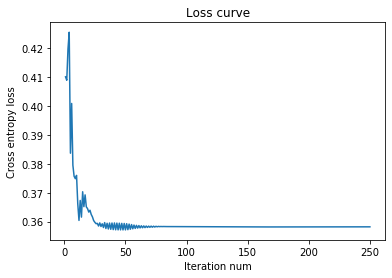

In [53]:
plt.plot([i+1 for i in range(len(model.losses))], model.losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Cross entropy loss")
plt.show()

In [63]:
def accuracy(y_true,y_pred):
    accuracy = np.equal(y_true,y_pred).mean()
    return accuracy

In [64]:
y_train.shape

(1688, 7)

In [66]:
# Accuracy on train data 
y_pred = model.predict(X_train)
y_pred.shape

(1688, 21)

In [67]:
# Accuracy on test data
print(f"Accuracy on train data: {accuracy(y_train,y_pred)}")

ValueError: operands could not be broadcast together with shapes (1688,7) (1688,21) 

### Trials

In [ ]:
# Initializing the label Encoder
le = LabelEncoder()

In [ ]:
# Label Encoding
# Integer Encoding for One Hot Encoding
le.fit(data['MTRANS'])

In [ ]:
le.classes_

In [ ]:
arr = le.transform(data['MTRANS'])
arr

In [ ]:
#One Hot Encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data[['MTRANS', 'NObeyesdad']]).toarray())

In [ ]:
data

In [ ]:
np.zeros?

In [ ]:
ar = [1, 2 , 3, 4, 5]

In [ ]:
ar.index(2)

In [ ]:
ar = np.array(ar)

In [ ]:
np.where(pd.DataFrame(ar).values > np.argmax(ar), 1, 0)

# Part 1.2: Use Logistic Regression from sklearn on the same dataset
**Tasks**

Define X and y again for sklearn Linear Regression model

**Note:**

    - Column at position 0 with all values=1 is not required. (Handled by scikit-learn built-in class)
    - One-hot encoding of the target column is not required. (Handled by scikit-learn built-in class)
    - Don't scale/normalize the target column, let them be whole numbers 0,1,2,... (sklearn does not recognize continuous values as categories)
- Train Logistic Regression Model on the training set (sklearn.linear_model.LogisticRegression class)
- Run the model on testing set
- Print 'accuracy' obtained on the testing dataset (sklearn.metrics.accuracy_score function)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
df = pd.read_csv('Data/obesity_data.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [83]:
X_s = df.iloc[:, :16] 
y_s = df.iloc[:, 16:]

In [84]:
X_s

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [85]:
y_s

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [86]:
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.20, random_state=0)

In [87]:
sk_model = LogisticRegression()

In [88]:
# Fit the model
sk_model.fit(X_s_train, y_s_train)

C:\Users\varun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Public_Transportation'